# Python und Plotting

Am Ende dieses jupyter notebooks sollen Sie in der Lage sein, einfache Plots zu erstellen, wie für die ersten Programmieraufgaben benötigt.

## Jupyter Notebook ausführen

Ein Jupyter Notebook enthält Textfelder und Codefelder. Damit kann man in diesem Dokument Code ausführen. Dies funktioniert über einen Shortcut (z.B. `<Shift>-<return>`), den die Programmierumgebung vorgibt, oder gegebenenfalls über einen Playbutton, der sich in der Nähe eines Codefeldes befindet.

Die Codefelder sind aufeinander aufbauend. Sobald also in einem oberen Codefeld etwas erstellt wurde oder ein Paket geladen wurde, kann darauf in allen späteren Codefeldern zugegriffen werden. Achten Sie beim Ausführen der Codefelder also auf die Reihenfolge.

## Zuweisungen, Vergleiche und Arithmetik

In Mathematikvorlesungen sahen Sie vermutlich bereits, dass ein Unterschied besteht zwischen einer Wertzuweisung ("$x$ soll ab jetzt den Wert $5$ tragen") und der Aussage, dass zwei Werte gleich sind ("$x^2$ ist gleich $26$", was nach der vorherigen Wertzuweisung eine falsche Aussage ist). Diesen Unterschied macht man auch in Programmiersprachen: Eine Zuweisung in Python erfolgt mit `=`, ein Test auf Gleichheit mit `==`.

Man kann eine Variable natürlich erst verwenden, nachdem ihr ein Wert zugewiesen wurde. Also geben wir `x` einen Wert und danach können wir es anzeigen und Vergleiche durchführen:

In [1]:
x = 5
x

5

Übrigens, das Symbol `#` in einer Codezelle leitet einen Kommentar ein, der im Notebook sichtbar ist, aber im Code nicht weiter stört. Der Kommentar endet am Ende der Zeile.

Will man sich in einer Zelle mehrere Dinge anzeigen lassen, sollte man die `print()`-Funktion verwenden, denn sonst wird jeweils nur die letzte Zeile der Zelle angezeigt.

In [2]:
print( x == 5 )
print( x < 4 )
print( x >= 5 )  # Kommentar: Dies testet, ob x größer oder gleich 5 ist.

True
False
True


Es geht in der Numerik um Zahlen, und dafür gibt es in Python verschiedene Datentypen. Den Typ eines Objekts fragt man mit `type()` ab. Ganze Zahlen kann man wie gewohnt angeben. Tritt in der Zahl ein Dezimalpunkt auf, wird sie als Gleitkommazahl (genauer: `double precision` nach dem Standard IEEE 754) aufgefasst. Um exakte und gerundete Arithmetik in Python wird es in anderen Notebooks gehen.

Bei dieser Gelegenheit mehr zur `print()`-Funktion: Gibt man mehrere durch Komma getrennte Daten an, werden alle nacheinander angezeigt, durch ein Leerzeichen getrennt. Einfachen Text setzt man in Anführungszeichen, `"..."` oder `'...'`.

In [3]:
print( 25, "hat den Typ", type( 25 ) )
print( 25., "hat den Typ", type( 25. ) )
print( 'Ein Text', "hat den Typ", type( 'Ein Text' ) )

25 hat den Typ <class 'int'>
25.0 hat den Typ <class 'float'>
Ein Text hat den Typ <class 'str'>


Man kann ein Objekt eines bestimmten Typs auch gezielt erzeugen. Wendet man `float()` auf einen `int` an, entsteht eine Gleitkommazahl des entsprechenden Wertes. Wendet man hingegen `int()` auf eine Gleitkommazahl an, entsteht ein `int` **durch simples Abschneiden der Nachkommastellen** (so wollen wir natürlich normalerweise *nicht* runden!!):

In [4]:
print( float( 3 ) )
print( int( -3.9 ) )
print( int( 7.999 ) )

3.0
-3
7


Zahlen addiert, subtrahiert, multipliziert und dividiert man mit `+`, `-`, `*`, `/`. Man kann dabei mehrere Typen von Zahlen mischen.

In [5]:
print( 2 + 3 )
print( 3 - 4. ) # int minus float ist ein float!
print( 4 / 2 ) # Bei Division zweier int entsteht ein float
print( 22 / 77 ) # ... der gerundet ist.

5
-1.0
2.0
0.2857142857142857


**Vorsicht**: Für das Exponenzieren verwendet man in Python einen Doppelstern, `**`. In SageMath (dessen Sprache im Wesentlichen auf Python basiert) ist es auch möglich, das eher gewohnte Symbol `^` zu verwenden. Aber in Python ohne SageMath bedeutet `^` stattdessen das "bitweise exklusive oder", auf das ich hier nicht eingehen möchte. Gewöhnen Sie sich also an `**`.

In [6]:
print( 3**5 )
print( "Wurzel aus 3:", 3**(1/2) )
print( "Wurzel aus 3 zum Quadrat:", ( 3**(1/2) ) ** 2 ) # Man beachte den Rundungsfehler!

243
Wurzel aus 3: 1.7320508075688772
Wurzel aus 3 zum Quadrat: 2.9999999999999996


Ein Computeralgebrasystem kann möglicherweise durch symbolisches Rechnen erkennen, dass das Quadrat der Wurzel aus 3 gleich 3 ist - doch das ist in der Numerik nicht erwünscht: Der Computer soll eine Formel nicht ohne expliziten Auftrag durch den Mensch verändern! Mehr zum Thema "Rundung" in späteren Notebooks.

## Numpy Arrays

In numerischen Algorithmen, aber auch bei der graphischen Darstellung von Funktionen, ist es oft vonnöten, die gleichen arithmetischen Operationen bzw. Funktionsauswertungen auf eine Liste von Zahlen anzuwenden. Man hat beispielsweise eine Liste von $x$-Werten, erhält durch Funktionsauswertung die zugehörigen $y$-Werte, und erhält durch die Liste von Punkten (die vielleicht noch durch einen Streckenzug verbunden werden) eine Darstellung des Funktionsgraphen.

All dies ist mit **numpy arrays** komfortabel möglich. Doch um diese verwenden zu können, müssen wir zuerst das Paket "numpy" laden ("importieren"). Dazu würde `import numpy` genügen, doch dann müssten wir im folgenden immer `numpy` als ganzes Wort schreiben. Es ist aber möglich, beim Importieren gleich einen abkürzenden Namen festzulegen, etwa `np` (auch üblich wäre die Abkürzung `num`). Dies geht so:

In [7]:
import numpy as np

Dieses Notebook soll nicht zu lang werden und wir wollen möglichst schnell zur Darstellung von Funktionsgraphen kommen. Daher verschiebe ich allgemeine Python-Listen auf ein anderes Notebook.

Beim Plotten ist es sinnvoll, in einem Intervall $[a,b]$ (auf der x-Achse) Auswertungsstellen mit vorgegebener Schrittweite  zu verteilen. Das geht in numpy die Funktion `arange(a, b, Schrittweite)`: Es entsteht ein array, das bei $a$ beginnt, weitere Zahlen im Abstand `Schrittweite` enthält und mit der letzten Zahl endet, die kleiner als $b$ ist. Wenn man also möchte, dass $b$ noch in dem array enthalten ist, muss man in der `arange`-Funktion den Endwert ggf. leicht vergrößern.

Will man die Funktion "fkt" aus dem Paket "pkt" verwenden, kann man dies mit der Syntax `pkt.fkt` tun. Wir wollen `arange` verwenden, also sagen wir:

In [8]:
a = np.arange( 0, 1, 0.1 )
print( a )
print( np.arange( 0, 1.001, 0.1 ) )

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Setzt man ein array in eine Funktion ein (etwa in die Kosinus-Funktion aus `numpy`), wird die Funktion auf jedes einzelne Element des array angewendet; analog bei arithmetischen Operationen. Das ist sehr praktisch.

In [9]:
print( np.cos(a) )
print( a*a )

[1.         0.99500417 0.98006658 0.95533649 0.92106099 0.87758256
 0.82533561 0.76484219 0.69670671 0.62160997]
[0.   0.01 0.04 0.09 0.16 0.25 0.36 0.49 0.64 0.81]


## Erstellen einfacher Plots

Matplotlib ist ein Paket, mit dem man Visualisierungen von Graphen und Ähnlichem erzeugen kann. Das Paket kann man sowohl für 2D Darstellungen als auch für 3D verwenden.

Wir verwenden hier das Unterpaket `matplotlib.pyplot`, importiert mit der Abkürzung `plt`.

In [10]:
import matplotlib.pyplot as plt

Schema für das Erstellen eines Plots: Mit `fig, ax = plt.subplots()` wird ein neuer Plot begonnen, wobei `subplots()` einerseits die noch zu füllende Abbildung `fig` und andererseits das zu der Abbildung gehörende Koordinatensystem `ax` zurück gibt.

Man erstellt die Abbildung, indem man in das Koordinatensystem eine Liste von x- und y-Werten mit der Funktion `ax.plot()` einfügt. Im ersten Beispiel plotten wir das Polynom `0.5*x**3 - 3*x**2 + 1`, indem wir es elementweise auf das Array der x-Werte anwenden.

Zuletzt zeigt man den Plot mit `plt.show( fig )` an:

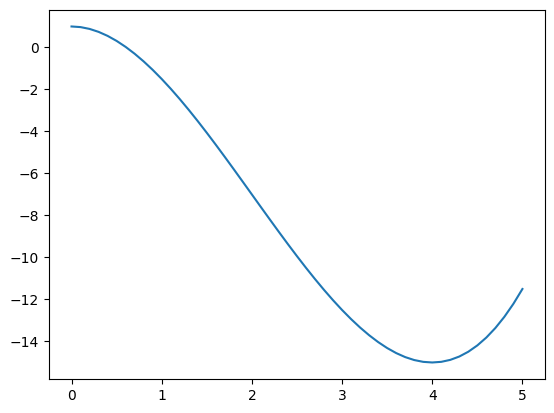

In [11]:
fig, ax = plt.subplots()
xrange = np.arange( 0, 5.1, 0.1 )
ax.plot( xrange, 0.5*xrange**3 - 3*xrange**2 + 1 )
plt.show( fig )

Sie können die Abbildung speichern mit `plt.savefig('filename.fmt')`, wobei `'filename.fmt'` der Name einschließlich extension der Datei ist, in der der gerade bearbeitete Plot gespeichert werden soll. Das Bildformat richtet sich nach der Extension, also 'name.png', 'name.pdf', 'name.eps' und so weiter. Sie können auch durch Rechtsklick auf die Abbildung im Notebook ein Menü öffnen und dort "Grafik speichern" wählen.

Wir wollen nun unsere Abbildungen etwas aufhübschen: Wir beschriften die Abbildung mit einer Legende (hier kann man übrigens LaTeX-Code benutzen), wählen eine andere Farbe (grün) und markieren die Auswertungsstellen mit einem Kreuz. Außerdem fügen wir ein Gitter ein.

Und nicht zuletzt verwenden wir diesmal zur Auswertung eine Funktion. Dazu mehr im nächsten Notebook. Hier nur soviel: Eine einfache Funktion, die eine `Formel` auf die Variable `x` anwendet, kann man durch `lambda x: Formel` erzeugen. Für $0.5x^3-3x^2+1$ erhält man:

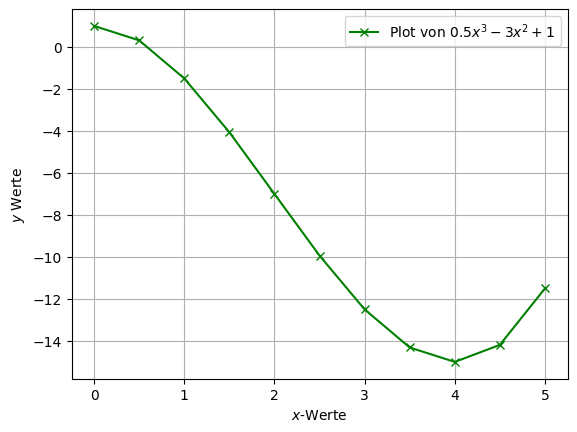

In [12]:
fig, ax = plt.subplots()
xrange = np.arange( 0, 5.1, 0.5 ) # Weniger Auswertungsstellen
f = lambda x: 0.5*x**3 - 3*x**2 + 1 # Definition der Funktion
# Im folgenden Plot werden mit '-x' an die Auswertungsstelle Kreuze gesetzt.
# Man kann analog auch Kreise oder ähnliches setzen.
ax.plot( xrange, f(xrange), '-x', color = 'green' )

## In $...$ steht LaTeX-Code
# Beschriftung der x-Achse
ax.set_xlabel('$x$-Werte')
# Beschriftung der y-Achse
ax.set_ylabel('$y$ Werte')
# Beschriftung der Darstellung
ax.legend(['Plot von $0.5x^3-3x^2+1$'])
# Gitter, um die Lesbarkeit zu vereinfachen
plt.grid(True)
plt.show( fig )

Wie man sieht, wird keine "glatte" Kurve, sondern ein Polygonzug dargestellt. Kompliziertere Plots werden wir in einem späteren Notebook behandeln.

# Nachtrag: Darstellung von Punktlisten

Wir wissen nun, wie wir eine Liste von $x$-Werten und zugehörigen $y$-Werten darstellen können: Wir haben jeweils eine Liste (oder array) der Länge $n$ für die $x$- und für die $y$-Werte separat.

Aber manchmal hat man eine Liste von $n$ Koordinatenpaaren, dann sind also die $x$- und $y$-Werte nicht getrennt. Hierfür hat `pyplot` leider keine fertige Lösung. Wir müssen also noch lernen, wie man bequem eine Liste von $n$ Paaren in ein Paar von Listen der Länge $n$ umwandelt.

Dies geht mit der `zip`-Funktion, die allgemein zu gegebenen $k$ Listen der Länge $n$ als Ausgabe $n$ Listen der Länge $k$ macht.

In [13]:
zip( [1,2,3], [4,5,6] )

Wie man sieht, muss man die Ausgabe erst noch explizit in eine Liste verwandeln:

In [14]:
L = list( zip( [1,2,3], [4,5,6] ) )
L

[(1, 4), (2, 5), (3, 6)]

Für die Rückumwandlung wäre es jetzt etwas mühsam, die drei eben erzeugten Paare separat abzutippen:

In [15]:
list( zip( (1,4), (2,5), (3,6) ) )

[(1, 2, 3), (4, 5, 6)]

Bequemer ist es, direkt mit `L` zu arbeiten. Problem: Wie macht man klar, dass man in die `zip`-Funktion nicht eine Liste, sondern den Inhalt der Liste als separate Eingabewerte sendet? Dafür gibt es die Notation `*L`:

In [16]:
list( zip( *L ) )

[(1, 2, 3), (4, 5, 6)]

In dem folgenden Beispiel wollen wir $(\sin(t),\sin(2t))$ für $t\in[0,2\pi]$ graphisch darstellen.

Lösungsidee:

 * Wir schreiben eine Funktion, die zu jedem $t$-Wert ein Koordinatenpaar zurückgibt. 
 * Diese Funktion wenden wir auf die Elemente eines `arange` an und schreiben das Ergebnis in eine Liste `L`
 * Aus der Liste von Koordinatenpaaren machen wir mittels `list(zip(*L))` eine Liste von $x$- und eine Liste von $y$-Werten.
 * Diese beiden Listen stecken wir wie gewohnt in die `plot`-Funktion.

In [17]:
from numpy import sin, pi
xy = lambda t: ( sin( t ), sin( 2*t ) )

In [18]:
L = [ xy( t ) for t in np.arange( 0, 2*pi+0.1, 0.05 ) ]

In [20]:
np.arange( 0, 2*pi+0.1, 0.05 )

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45,
       5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  ,
       6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35])

In [ ]:
np.linspace(0,2*pi,100)

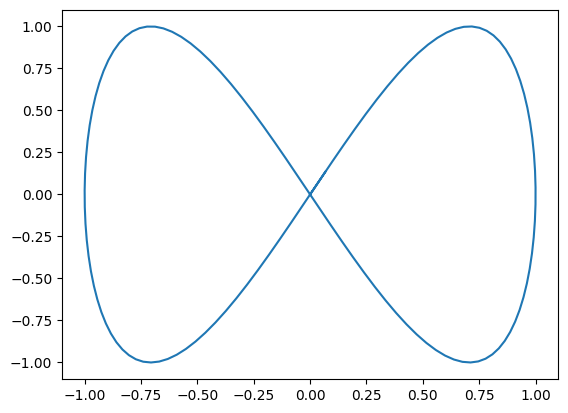

In [19]:
fig, ax = plt.subplots()
x, y = list( zip( *L ) )
ax.plot( x, y )
plt.show( fig )